## Setup

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from thunder.images import fromtif
from showit import image

In [4]:
from skimage.io import imsave, imread

## Set directory and session information

In [5]:
directory = '/tier2/freeman/Nick/neurofinder/neurofinder.02.00/images'

In [6]:
data = fromtif(directory, ext='tiff', engine=sc)

In [7]:
data

Images
mode: spark
dtype: uint16
shape: (8000, 512, 512)

In [335]:
mean = data.mean().toarray()

In [9]:
from extraction import load

In [10]:
modelCompare = load('/tier2/freeman/Nick/neurofinder/neurofinder.02.00/regions/regions3.json')

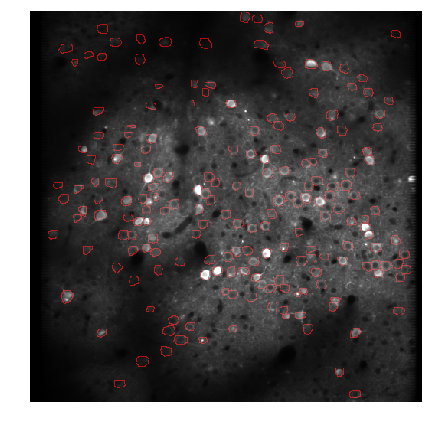

In [15]:
blend = overlay(modelCompare.regions, image=mean)
image(blend);

### Extraction

In [16]:
from extraction import NMF

In [17]:
algorithm = NMF(k=5, percentile=99, max_iter=50, overlap=0.1)
unmerged = algorithm.fit(data, chunk_size=(50,50), padding=(25,25))
model = unmerged.merge(0.1)

In [18]:
blend = overlay(model.regions, image=mean, compare=modelCompare.regions, threshold=5, correct=True)
print(compare(model.regions, modelCompare.regions, threshold=5))

{'exclusion': 0.75753419439797687, 'recall': 0.67836257309941517, 'precision': 0.58883248730964466, 'threshold': 5, 'inclusion': 0.77490404597908114}


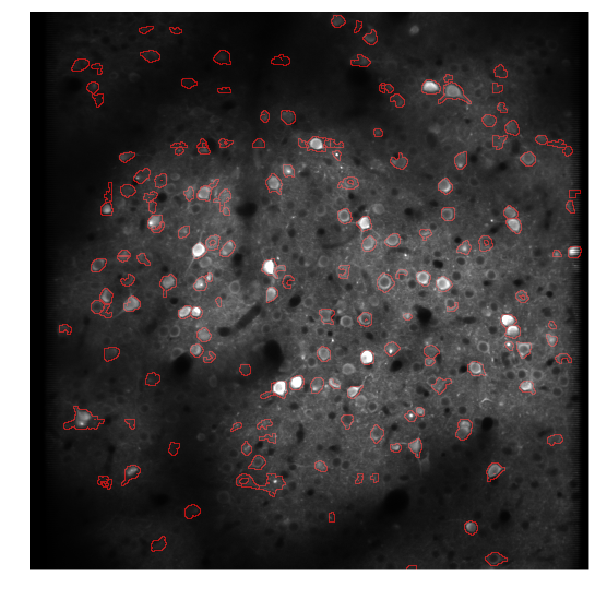

In [19]:
blend = overlay(model.regions, image=mean)
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
image(blend, ax=ax)
plt.xlim([0, blend.shape[1]]);
plt.ylim([blend.shape[0], 0]);

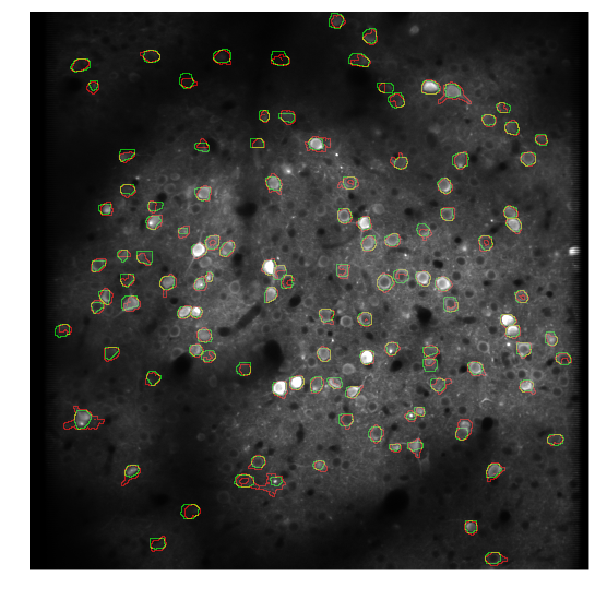

In [20]:
blend = overlay(model.regions, image=mean, compare=modelCompare.regions, threshold=5, correct=True)
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
image(blend, ax=ax)
plt.xlim([0, blend.shape[1]]);
plt.ylim([blend.shape[0], 0]);

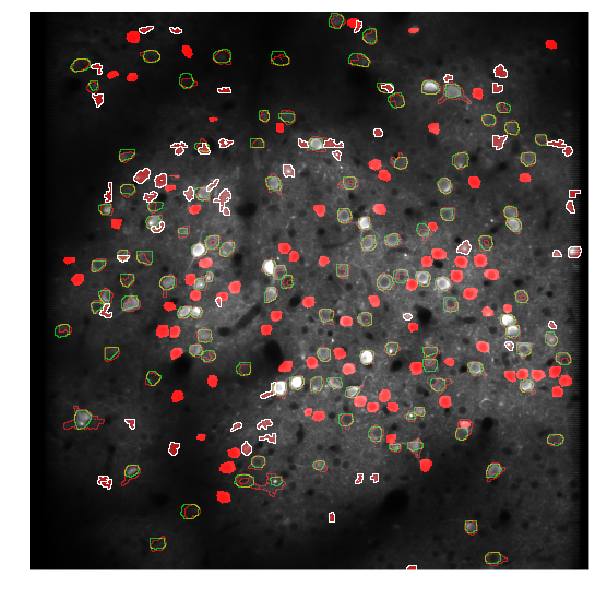

In [21]:
blend = overlay(model.regions, image=mean, compare=modelCompare.regions, threshold=5)
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
image(blend, ax=ax)
plt.xlim([0, blend.shape[1]]);
plt.ylim([blend.shape[0], 0]);

## Region morph.

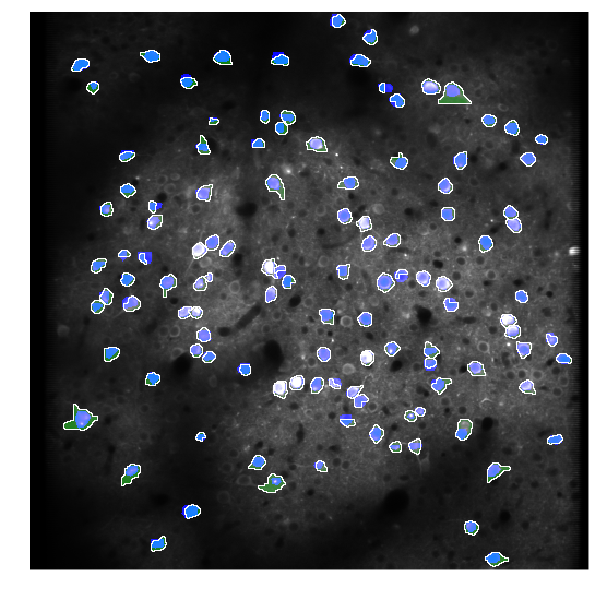

In [173]:
blend = overlay(xxx, image=mean, compare=modelCompare.regions, threshold=5, correct=True)
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
image(blend, ax=ax)
plt.xlim([0, blend.shape[1]]);
plt.ylim([blend.shape[0], 0]);

In [174]:
print(compare(xxx, modelCompare.regions, threshold=5))

{'exclusion': 0.79586412655070382, 'recall': 0.65714285714285714, 'precision': 0.58375634517766495, 'threshold': 5, 'inclusion': 0.77075742326227981}


In [37]:
model.save('/tier2/freeman/Nick/neurofinder/neurofinder.02.00/regions/regions-nmf.json')

In [172]:
xxx = many([closing(x,20) for x in xx])

In [166]:
xx = many([fill(x) for x in model.regions])

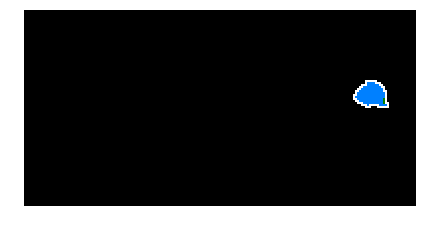

In [148]:
image(overlay(many(xx), image = zeros((100, 200)), compare=many(model.regions[5])))

In [48]:
from regional import one
from numpy import zeros, ones

In [165]:
def fill(self):
    """
    Fill a region using morphological operators.
    """
    from scipy.ndimage.morphology import binary_fill_holes
    coords = self.coordinates
    tmp = zeros(self.extent)
    coords = (coords - self.bbox[0:len(self.center)])
    tmp[coords.T.tolist()] = 1
    tmp = binary_fill_holes(tmp)
    new = asarray(where(tmp)).T + self.bbox[0:len(self.center)]
    new = [c for c in new if all(c >= 0)]

    return one(new)

In [65]:
def erosion(self, size):
    """
    Erode a region using morphological operators.
    Parameters
    ----------
    size : int
        Size of erosion in pixels
    """
    if size > 0:
        from scipy.ndimage.morphology import binary_erosion
        size = (size * 2) + 1
        coords = self.coordinates
        tmp = zeros(self.extent + size * 2)
        coords = (coords - self.bbox[0:len(self.center)] + size)
        tmp[coords.T.tolist()] = 1
        tmp = binary_erosion(tmp, ones((size, size)))
        new = asarray(where(tmp)).T + self.bbox[0:len(self.center)] - size
        new = [c for c in new if all(c >= 0)]
    else:
        return self

    return one(new)

In [129]:
def closing(self, size):
    """
    Close a region using morphological operators.
    Parameters
    ----------
    size : int
        Size of closing in pixels
    """
    if size > 0:
        from scipy.ndimage.morphology import binary_closing
        size = (size * 2) + 1
        coords = self.coordinates
        tmp = zeros(self.extent + size * 2)
        coords = (coords - self.bbox[0:len(self.center)] + size)
        tmp[coords.T.tolist()] = 1
        tmp = binary_closing(tmp, ones((size, size)))
        new = asarray(where(tmp)).T + self.bbox[0:len(self.center)] - size
        new = [c for c in new if all(c >= 0)]
    else:
        return self

    return one(new)

In [77]:
def opening(self, size):
    """
    Open a region using morphological operators.
    Parameters
    ----------
    size : int
        Size of opening in pixels
    """
    if size > 0:
        from scipy.ndimage.morphology import binary_opening
        size = (size * 2) + 1
        coords = self.coordinates
        tmp = zeros(self.extent + size * 2)
        coords = (coords - self.bbox[0:len(self.center)] + size)
        tmp[coords.T.tolist()] = 1
        tmp = binary_opening(tmp, ones((size, size)))
        new = asarray(where(tmp)).T + self.bbox[0:len(self.center)] - size
        new = [c for c in new if all(c >= 0)]
    else:
        return self

    return one(new)

In [39]:
def dilate(self, size):
    """
    Dilate a region using morphological operators.
    Parameters
    ----------
    size : int
        Size of dilation in pixels
    """
    if size > 0:
        from scipy.ndimage.morphology import binary_dilation
        size = (size * 2) + 1
        coords = self.coordinates
        tmp = zeros(self.extent + size * 2)
        coords = (coords - self.bbox[0:len(self.center)] + size)
        tmp[coords.T.tolist()] = 1
        tmp = binary_dilation(tmp, ones((size, size)))
        new = asarray(where(tmp)).T + self.bbox[0:len(self.center)] - size
        new = [c for c in new if all(c >= 0)]
    else:
        return self

    return one(new)

## Detrend

In [22]:
from numpy import arange, polyfit, polyval

In [23]:
def detrend(y, order=5):
        """
        Detrend series data with linear or nonlinear detrending.
        Preserve intercept so that subsequent operations can adjust the baseline.
        Parameters
        ----------
        method : str, optional, default = 'linear'
            Detrending method
        order : int, optional, default = 5
            Order of polynomial, for non-linear detrending only
        """

        x = arange(len(y))
        p = polyfit(x, y, order)
        p[-1] = 0
        yy = polyval(p, x)
        return y - yy

## Normalize

In [25]:
def normalize(oim):
    # normalizes 3D image across first axis
    assert oim.ndim == 3
    
    means = oim.mean(axis=(1, 2), dtype='float32')
    return array([oim[i]/means[i]/4 for i in range(oim.shape[0])]).clip(0, 1)

## Center detection

In [429]:
from numpy import round
centercoords = [round(region.center).astype('int') for region in model.regions]
size = 15

In [610]:
from numpy import round
centercoords = [round(region.center).astype('int') for region in modelCompare.regions]
size = 15

In [27]:
np.mean(modelCompare.regions.extent, axis=0)

array([ 10.07106599,  11.64467005])

## Boundary detection

In [648]:
from extraction.model import ExtractionModel

In [611]:
def selectcenters(data, centers, size):
    from numpy import array, pad
    
    def select(data, centers, size):
        padded = pad(data, size, 'constant')
        return array([padded[center[0]:center[0]+2*size+1,center[1]:center[1]+2*size+1] for center in centers])
    
    return data.map(lambda x: select(x, centers, size), value_shape = (len(centers), 2*size+1, 2*size+1))

In [612]:
def centercorr(self, sigma=2):
        """
        Correlate every pixel in an image sequence to the average of its local neighborhood.
        This algorithm computes, for every pixel, the correlation coefficient
        between the sequence of values for that pixel, and the average of all pixels
        in a local neighborhood. It does this by blurring the image(s) with a uniform filter,
        and then correlates the original sequence with the blurred sequence.
        Parameters
        ----------
        size : int or tuple, optional, default = 2
            Size of the filter in pixels. If a scalar, will use the same filter size
            along each dimension.
        """

        from thunder.images.readers import fromarray, fromrdd
        from numpy import corrcoef, concatenate, tile, array, isnan
        from scipy.ndimage.filters import gaussian_filter
        
        nimages = self.shape[0]

        # spatially average the original image set over the specified neighborhood
        def restrictedGaussianFilter(x, sigma):
            return array([gaussian_filter(y, sigma) for y in x])
        
        blurred = self.map(lambda x: restrictedGaussianFilter(x, sigma))

        def copyCenter(x):
            return tile(x[:, x.shape[1]/2+1, x.shape[2]/2+1], (x.shape[1], x.shape[2], 1)).transpose(2,0,1)

        blurred = blurred.map(copyCenter)
        
        # union the averaged images with the originals to create an
        # Images object containing 2N images (where N is the original number of images),
        # ordered such that the first N images are the averaged ones.
        if self.mode == 'spark':
            combined = self.values.concatenate(blurred.values)
            combined_images = fromrdd(combined.tordd())
        else:
            combined = concatenate((self.values, blurred.values), axis=0)
            combined_images = fromarray(combined)

        # correlate the first N (averaged) records with the last N (original) records
        series = combined_images.toseries()
        corr = series.map(lambda x: corrcoef(x[:nimages], x[nimages:])[0, 1]).toarray()
        corr[isnan(corr)] = 0
        
        return corr

In [613]:
from numpy import arange, newaxis, exp, log

def makeGaussian(size, fwhm = 3, center=None):
    """ Make a square gaussian kernel.
    size is the length of a side of the square
    fwhm is full-width-half-maximum, which
    can be thought of as an effective radius.
    """

    x = arange(0, size, 1, float)
    y = x[:, newaxis]
    
    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]
    
    return exp(-4*log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

In [649]:
def detectcenters(corr, thresh, fwhm=8):
    template = makeGaussian(corr.shape[1], fwhm)
    rescaled = array([x*template for x in corr])
    return [ExtractionModel([array(where(x>thresh)).T]) for x in rescaled]

In [654]:
def replacecenters(models, centers):
    return ExtractionModel([[y + centers[ii] - [size, size] for y in models[ii].regions.coordinates][0] for ii in range(len(centers))])

In [616]:
detrended = data.map_as_series(lambda x: detrend(x))

In [617]:
reshaped = selectcenters(detrended, centercoords, size)

In [618]:
corr = centercorr(reshaped, sigma=2)

In [619]:
avg = selectcenters(data, centercoords, size).mean().toarray()

In [620]:
from numpy import concatenate
joined = concatenate((normalize(avg), corr), axis=2)

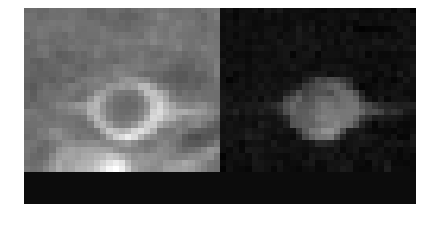

In [640]:
image(joined[0]);

In [642]:
path = '/tier2/freeman/Nick/neurofinder/neurofinder.02.00/regions/Qgt-regions-joined.tif'
imsave(path, (255*joined.clip(0, 1)).astype('uint8'), plugin='tifffile')

### Evaluate

In [675]:
from numpy import linspace
d = []
vals = linspace(0.01, 0.1, 50)
for thresh in vals:
    modelList = detectcenters(corr, thresh, fwhm=8)
    modelEmb = replacecenters(modelList, centercoords)
    results = compare(modelEmb, modelCompare, threshold = 5)
    d.append([results['inclusion'], results['exclusion']])
d = array(d)

In [676]:
from numpy import argmax
arg = argmax((d[:,0]**2+d[:,1]**2))
print(d[arg])
print(vals[arg])

[ 0.81812828  0.89001202]
0.024693877551


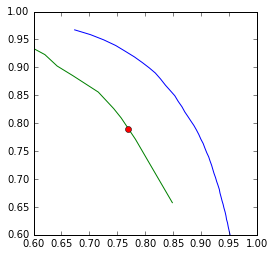

In [677]:
plt.figure(figsize=(4, 4))
plt.plot(d[:,0], d[:,1]);
plt.plot(dd[:,0], dd[:,1]);

plt.plot(0.77, 0.79, marker='o');
plt.xlim([0.6, 1]);
plt.ylim([0.6, 1]);

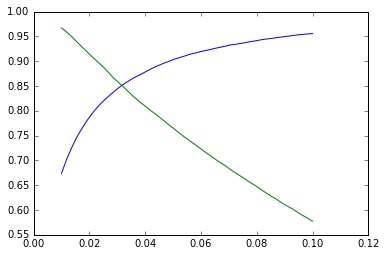

In [678]:
plt.plot(vals, d[:,0]);
plt.plot(vals, d[:,1]);

In [686]:
thresh = 0.0315
modelList = detectcenters(corr, thresh, fwhm=8)
modelEmb = replacecenters(modelList, centercoords)
compare(modelEmb, modelCompare, threshold = 5)

{'exclusion': 0.85187376758264,
 'inclusion': 0.85093624728776895,
 'precision': 1.0,
 'recall': 1.0,
 'threshold': 5}

In [687]:
compareRegions = [many([array([y - round(x.center).astype('int') + [size+1, size+1] for y in x.coordinates])]) for x in modelCompare.regions]
blend = array([overlay(modelList[i].regions, image=avg[i], compare=compareRegions[i]) for i in range(avg.shape[0])])
#blend = array([overlay(newRegions[i], image=avg[i]) for i in range(avg.shape[0])])

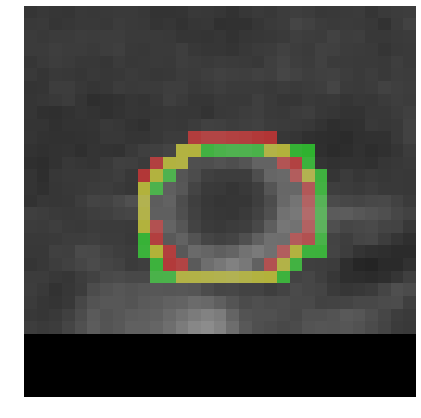

In [688]:
image(blend[0]);

In [635]:
path = '/tier2/freeman/Nick/neurofinder/neurofinder.02.00/regions/Qgt-regions-zoom.tif'
imsave(path, (255*blend).astype('uint8'), plugin='tifffile', photometric='rgb')

In [689]:
from numpy import concatenate
blendL = array([overlay(modelList[i].regions, image=avg[i], compare=compareRegions[i]) for i in range(avg.shape[0])])
blendR = array([overlay(modelList[i].regions, image=corr[i], compare=compareRegions[i]) for i in range(avg.shape[0])])
joined = concatenate((blendL, blendR), axis=2)

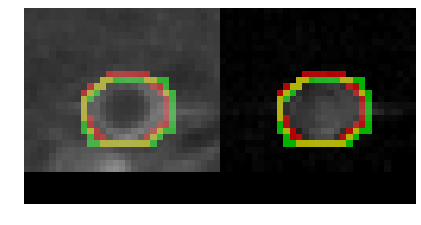

In [690]:
image(joined[0]);

In [647]:
path = '/tier2/freeman/Nick/neurofinder/neurofinder.02.00/regions/Qgt-regions-joined.tif'
imsave(path, (255*joined).astype('uint8'), plugin='tifffile', photometric='rgb')

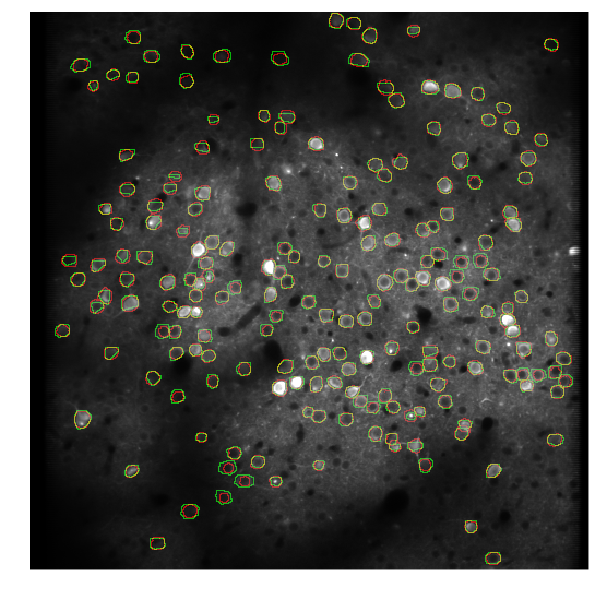

In [691]:
blend = overlay(modelEmb.regions, image=mean, compare=modelCompare.regions, threshold=5, correct=True)
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
image(blend, ax=ax)
plt.xlim([0, blend.shape[1]]);
plt.ylim([blend.shape[0], 0]);

In [637]:
path = '/tier2/freeman/Nick/neurofinder/neurofinder.02.00/regions/Qgt-regions-all.tif'
imsave(path, (255*blend).astype('uint8'), plugin='tifffile', photometric='rgb')

In [692]:
model.save('/tier2/freeman/Nick/neurofinder/neurofinder.02.00/regions/regions-gtBoundary.json')

## Transform

In [ ]:
sources = model.transform(data)

## Move to package

In [11]:
from numpy import maximum, percentile, full, nan, where, tile, inf, isnan
from neurofinder import match
from regional import many

In [656]:
def overlay(regions, image=None, compare=None, threshold=inf, correct=False):
    
    if image is not None:
        if image.max() > 1:
            clim = 3*percentile(image, 90)
            im = (image.astype(float)/clim).clip(0,1)
        else:
            im = image
        size = im.shape
    else:
        size = (max([r.bbox[2] for r in regions])+1, max([r.bbox[3] for r in regions])+1)
        if compare is not None:
            sizeCompare = (max([r.bbox[2] for r in compare])+1, max([r.bbox[3] for r in compare])+1)
            size = (maximum(size[0], sizeCompare[0]), maximum(size[1], sizeCompare[1]))
        im = full(size, 0.0)


    if compare is not None:
        matches = match(regions, compare, threshold)
        matchesCompare = full(compare.count,nan)
        
        for ii in where(~isnan(matches))[0]:
            matchesCompare[matches[ii]] = ii

        if any(~isnan(matches)):
            hits = many([regions[i] for i in where(~isnan(matches))[0]])
            #h = hits.mask(size, background='black', fill='green', stroke='white')
            h = hits.mask(size, background='black', fill=None, stroke=[0.7, 0, 0])
        else:
            h = full((size[0], size[1], 3), 0.0)
        if any(isnan(matches)):
            falseAlarms = many([regions[i] for i in where(isnan(matches))[0]])
            fA = falseAlarms.mask(size, background='black', fill=[.7, 0, 0], stroke='white')
        else:
            fA = full((size[0], size[1], 3), 0.0)
        if any(~isnan(matchesCompare)):
            truePositives = many([compare[i] for i in where(~isnan(matchesCompare))[0]])
            #tP = truePositives.mask(size, background='black', fill='blue', stroke='black')
            tP = truePositives.mask(size, background='black', fill=None, stroke=[0, 0.7, 0])
        else:
            tP = full((size[0], size[1], 3), 0.0)
        if any(isnan(matchesCompare)):
            misses = many([compare[i] for i in where(isnan(matchesCompare))[0]])
            m = misses.mask(size, background='black', fill='red', stroke='black')
        else:
            m = full((size[0], size[1], 3), 0.0)
        if correct:
            mask = maximum(tP, h)            
        else:
            mask = maximum(maximum(maximum(tP, fA), h), m)
    else:
        mask = regions.mask(size, background='black', fill=[.7, 0, 0], stroke='white')
        #mask = regions.mask(size, background='black', fill=None, stroke=[.7, 0, 0])


    base = tile(im,(3,1,1)).transpose(1,2,0)
    return maximum(base, mask)

In [657]:
from neurofinder import centers, shapes

In [666]:
def compare(a, b, threshold=inf):
    recall, precision = centers(a.regions, b.regions, threshold)
    inclusion, exclusion = shapes(a.regions, b.regions, threshold)
    return {'recall':recall, 'precision':precision, 'inclusion':inclusion, 'exclusion':exclusion, 'threshold':threshold}